# TaylorF2Ecc(3PN) vs TaylorF2Ecc(3.5PN) without spin

In [2]:
import numpy as np
import bilby
import gwpy
import corner
import h5py
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
%matplotlib inline

C = 299792458.
G = 6.67408*1e-11
Mo = 1.989*1e30
Mpc = 3.086*1e22

In [5]:
result1 = bilby.result.read_in_result("TaylorF2EccFD_3p5pn_spin.hdf5")

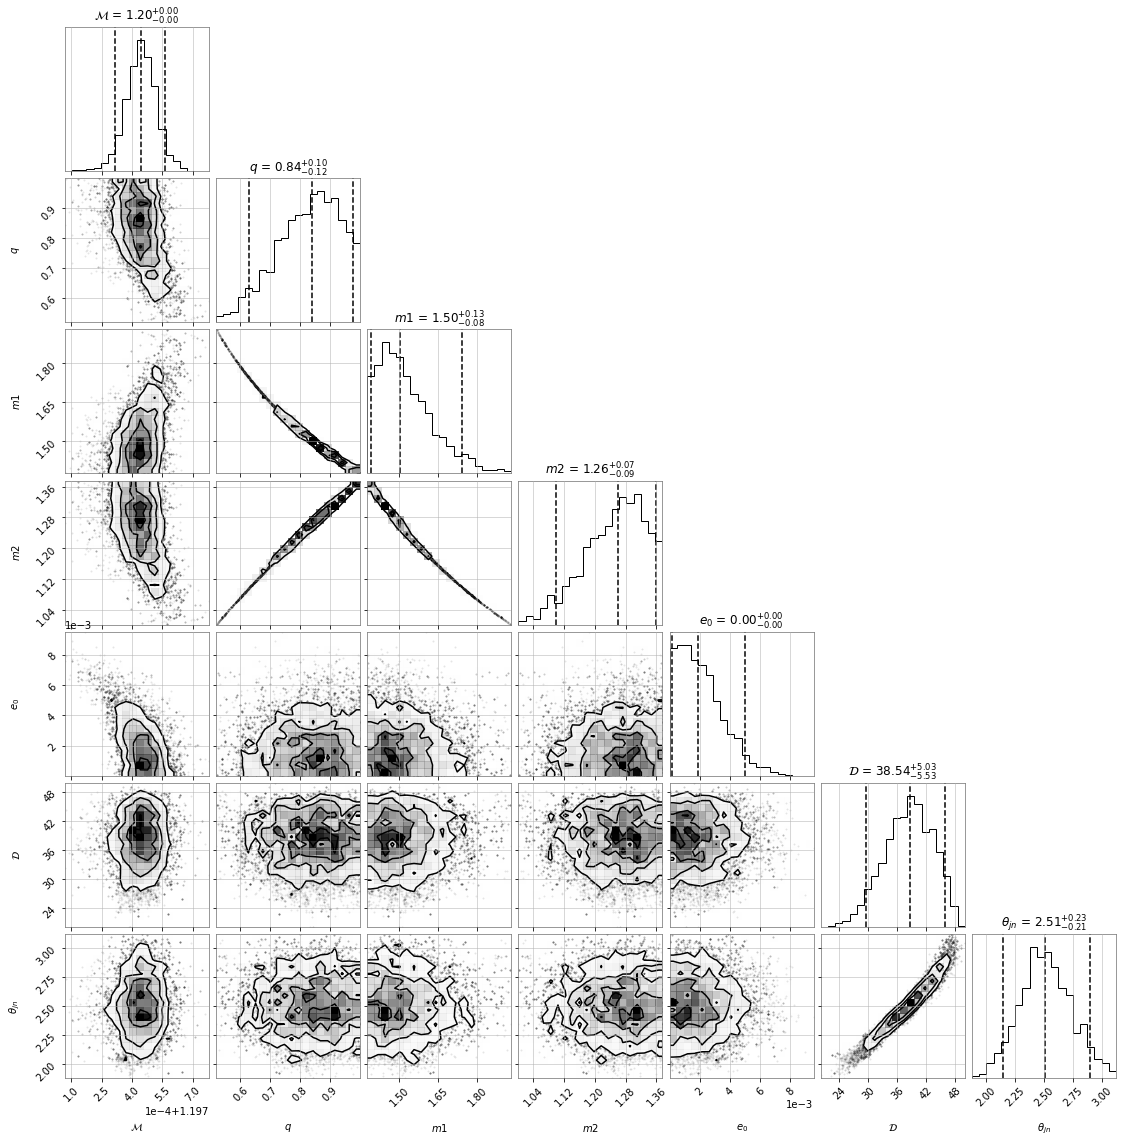

In [6]:
chirp_mass1 = result1.posterior["chirp_mass"].values
mass_ratio1 =  result1.posterior["mass_ratio"].values
e01 = result1.posterior["eccentricity"].values
theta_jn1 = result1.posterior["theta_jn"].values
D1 = result1.posterior["luminosity_distance"].values
ra1 = result1.posterior["ra"].values
dec1 = result1.posterior["dec"].values

m11 = (chirp_mass1*(1+mass_ratio1)**(1/5))/mass_ratio1**(3/5)
m21 = chirp_mass1*mass_ratio1**(2/5)*(1+mass_ratio1)**(1/5)

data1 = np.transpose(np.array([chirp_mass1,mass_ratio1,m11,m21,e01,D1,theta_jn1]))
figure = corner.corner(data1, labels=[r"$\mathcal{M}$", r"$q$",r"$m1$", r"$m2$", r"$e_0$", r"$\mathcal{D}$", r"$\theta_{jn}$"],
                       quantiles=[0.05, 0.5, 0.95],
                       show_titles=True, title_kwargs={"fontsize": 12})

In [9]:
result2 = bilby.result.read_in_result("TaylorF2EccFD_3p5pn_nospin.hdf5")

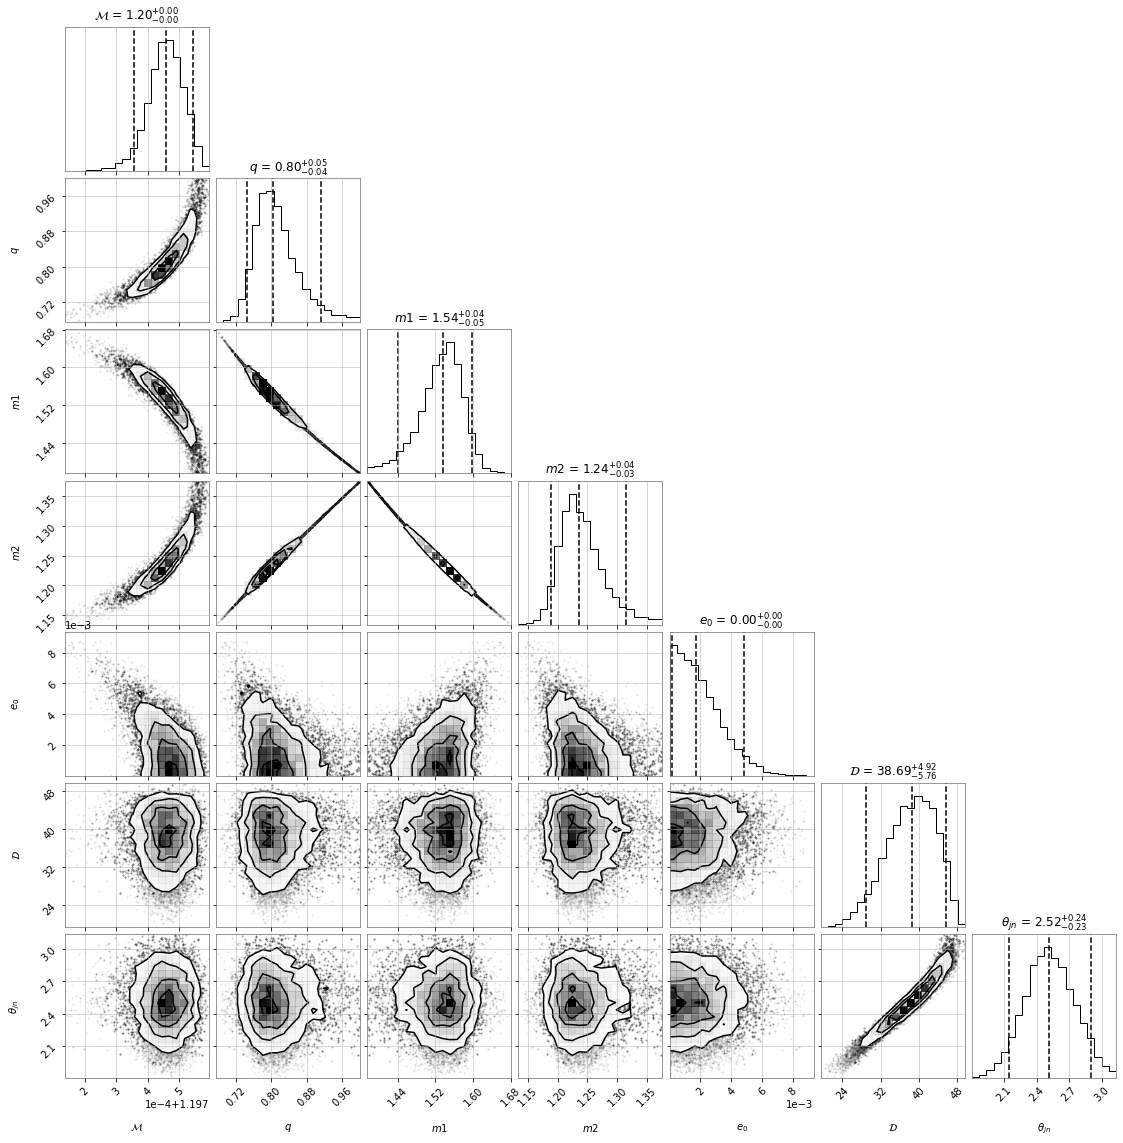

In [10]:
chirp_mass2 = result2.posterior["chirp_mass"].values
mass_ratio2 =  result2.posterior["mass_ratio"].values
e02 = result2.posterior["eccentricity"].values
theta_jn2 = result2.posterior["theta_jn"].values
D2 = result2.posterior["luminosity_distance"].values
ra2 = result2.posterior["ra"].values
dec2 = result2.posterior["dec"].values

m12 = (chirp_mass2*(1+mass_ratio2)**(1/5))/mass_ratio2**(3/5)
m22 = chirp_mass2*mass_ratio2**(2/5)*(1+mass_ratio2)**(1/5)

data2 = np.transpose(np.array([chirp_mass2,mass_ratio2,m12,m22,e02,D2,theta_jn2]))
figure = corner.corner(data2, labels=[r"$\mathcal{M}$", r"$q$",r"$m1$", r"$m2$", r"$e_0$", r"$\mathcal{D}$", r"$\theta_{jn}$"],
                       quantiles=[0.05, 0.5, 0.95],
                       show_titles=True, title_kwargs={"fontsize": 12})

In [13]:
result3 = bilby.result.read_in_result("TaylorF2EccFD_3pn_nospin.hdf5")

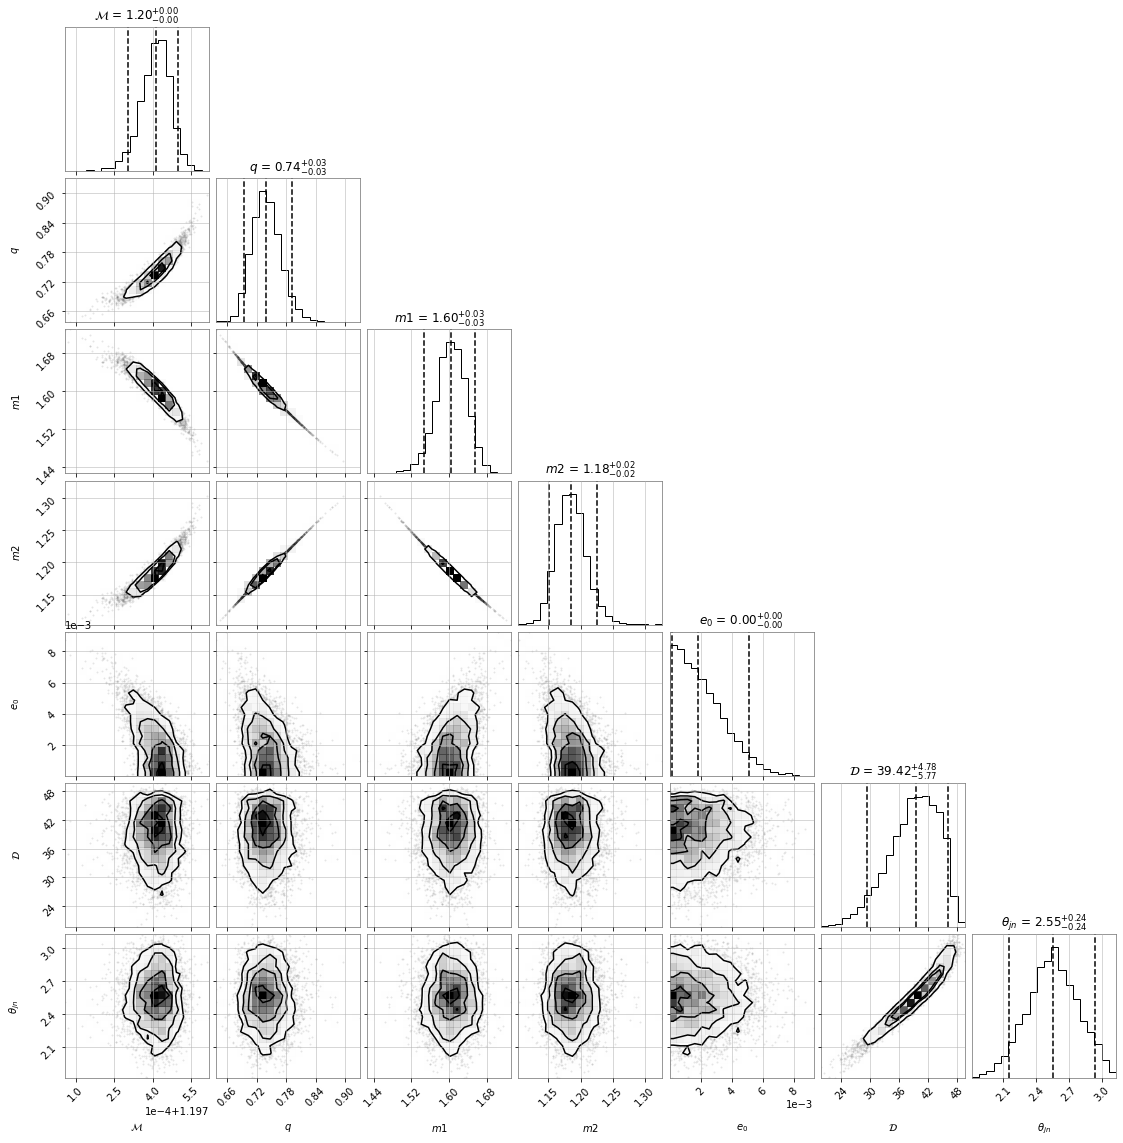

In [14]:
chirp_mass3 = result3.posterior["chirp_mass"].values
mass_ratio3 =  result3.posterior["mass_ratio"].values
e03 = result3.posterior["eccentricity"].values
theta_jn3 = result3.posterior["theta_jn"].values
D3 = result3.posterior["luminosity_distance"].values
ra3 = result3.posterior["ra"].values
dec3 = result3.posterior["dec"].values

m13 = (chirp_mass3*(1+mass_ratio3)**(1/5))/mass_ratio3**(3/5)
m23 = chirp_mass3*mass_ratio3**(2/5)*(1+mass_ratio3)**(1/5)

data3 = np.transpose(np.array([chirp_mass3,mass_ratio3,m13,m23,e03,D3,theta_jn3]))
figure = corner.corner(data3, labels=[r"$\mathcal{M}$", r"$q$",r"$m1$", r"$m2$", r"$e_0$", r"$\mathcal{D}$", r"$\theta_{jn}$"],
                       quantiles=[0.05, 0.5, 0.95],
                       show_titles=True, title_kwargs={"fontsize": 12})

In [15]:
print(len(chirp_mass1),len(chirp_mass2),len(chirp_mass3))

14858 28107 4114


In [16]:
num = 4114

In [17]:
buffer1 = np.random.choice(chirp_mass1,num)
a1 = np.array([])
b1 = np.array([])
c1 = np.array([])
for i in range(num):
    idx1 = np.argwhere(chirp_mass1==buffer1[i])[0,0]
    a1 = np.append(a1,chirp_mass1[idx1])
    b1 = np.append(b1,mass_ratio1[idx1])
    c1 = np.append(c1,e01[idx1])
    
buffer2 = np.random.choice(chirp_mass2,num)
a2 = np.array([])
b2 = np.array([])
c2 = np.array([])
for i in range(num):
    idx2 = np.argwhere(chirp_mass2==buffer2[i])[0,0]
    a2 = np.append(a2,chirp_mass2[idx2])
    b2 = np.append(b2,mass_ratio2[idx2])
    c2 = np.append(c2,e02[idx2])
    
buffer3 = np.random.choice(chirp_mass3,num)
a3 = np.array([])
b3 = np.array([])
c3 = np.array([])
for i in range(num):
    idx3 = np.argwhere(chirp_mass3==buffer3[i])[0,0]
    a3 = np.append(a3,chirp_mass3[idx3])
    b3 = np.append(b3,mass_ratio3[idx3])
    c3 = np.append(c3,e03[idx3])

In [18]:
data1 = np.transpose(np.array([a1,b1,c1]))
data2 = np.transpose(np.array([a2,b2,c2]))
data3 = np.transpose(np.array([a3,b3,c3]))

In [30]:
CORNER_KWARGS = dict(
    bins=30,
    smooth=0.9,
    label_kwargs=dict(fontsize=16),
    title_kwargs=dict(fontsize=16),
    #quantiles=[0.05, 0.5, 0.95],
    plot_density=False,
    plot_datapoints=False,
    fill_contours=False,
    show_titles=False,
    #density=True,
    max_n_ticks=5,
    contourf_kwargs= dict(alpha=0.4),
)

def overlaid_corner(samples_list, sample_labels):
    """Plots multiple corners on top of each other"""
    # get some constants
    n = len(samples_list)
    _, ndim = samples_list[0].shape
    max_len = max([len(s) for s in samples_list])
    cmap = plt.cm.get_cmap('tab10', 10 )
    colors = [cmap(i) for i in range(10)]

    plot_range = []
    for dim in range(ndim):
        plot_range.append(
            [
                min([min(samples_list[i].T[dim]) for i in range(n)]),
                max([max(samples_list[i].T[dim]) for i in range(n)]),
            ]
        )

    CORNER_KWARGS.update(range=plot_range)

    fig = corner.corner(
        samples_list[0],
        color=colors[0],
        **CORNER_KWARGS,
    )

    for idx in range(1, n):
        fig = corner.corner(
                samples_list[idx],
                fig=fig,
                weights=get_normalisation_weight(len(samples_list[idx]), max_len),
                #labels=[r"$\mathcal{M}$", r"$q$", r"$m_1$",r"$m_2$",r"$e_0$",r"$\phi_{ref}$"],
                labels=[r"$\mathcal{M}$", r"$q$", r"$e_0$"],
                color=colors[idx],
                **CORNER_KWARGS)
        '''if idx==3: 
            fig = corner.corner(
                samples_list[idx],
                fig=fig,
                weights=get_normalisation_weight(len(samples_list[idx]), max_len),
                labels=[r"$\mathcal{M}$", r"$q$",r"$e_0$"],
                color=colors[idx],
                **CORNER_KWARGS)
        else: 
            fig = corner.corner(
                samples_list[idx],
                fig=fig,
                weights=get_normalisation_weight(len(samples_list[idx]), max_len),
                labels=[r"$\mathcal{M}$", r"$q$",r"$e_0$"],
                color=colors[idx],
                **CORNER_KWARGS2)'''

    plt.legend(
        handles=[
            mlines.Line2D([], [], color=colors[i], label=sample_labels[i])
            for i in range(n)
        ],
        fontsize=20, frameon=False,
        bbox_to_anchor=(1, ndim), loc="upper right"
    )
    figure = plt.gcf()
    figure.set_size_inches(7, 7)
    plt.savefig("TF2Ecc_comparision.png")
    plt.close()


def get_normalisation_weight(len_current_samples, len_of_longest_samples):
    return np.ones(len_current_samples) * (len_of_longest_samples / len_current_samples)

In [32]:
def main():

    overlaid_corner(
        [data1, data2, data3],
        ["TF2Ecc(3.5PN,Spin)","TF2Ecc(3.5PN,noSpin)","TF2Ecc(3PN,noSpin)"]
    )


if __name__ == "__main__":
    main()

/local/hemantakumar.phurailatpam/ipykernel_2096285/2011454133.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', 10 )


In [9]:
corner.quantile(data1[:,5], [0.05, 0.5, 0.95])

array([29.3802109 , 38.86917122, 45.84615748])

In [10]:
corner.quantile(data2[:,5], [0.05, 0.5, 0.95])

array([32.40463301, 39.91438352, 47.1363754 ])

In [31]:
corner.quantile(data0[:,5], [0.05, 0.5, 0.95])

array([24.93826534, 39.9556685 , 47.29900186])

In [11]:
29.3802109-45.84615748

-16.46594658

In [12]:
32.40463301-47.1363754

-14.73174239

In [32]:
24.93826534-47.29900186

-22.360736519999996

In [33]:
result1.log_10_bayes_factor

367.5686716629634

In [34]:
result2.log_10_bayes_factor

368.39622332589965

In [35]:
result3.log_10_bayes_factor

368.4299826409421